<a href="https://colab.research.google.com/github/mohdrizwan11/mnist-dense-neural-network/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

# Load Dataset

In [ ]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Original Training Shape:", x_train.shape)
print("Original Test Shape:", x_test.shape)

Original Training Shape: (60000, 28, 28)
Original Test Shape: (10000, 28, 28)


# Preprocess Data

In [ ]:
#Normalize pixels (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Flatten images (28×28 → 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
#Create Validation Set
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=10000,
    random_state=42
)

print("Train:", x_train.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train: (50000, 784)
Validation: (10000, 784)
Test: (10000, 784)


# Create Model


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

layer_1 = Dense(
    units=25,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.001),
    input_shape=(784,)
)

layer_2 = Dense(
    units=15,
    activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
)

layer_3 = Dense(
    units=10,
    activation='softmax'
)

model = Sequential([layer_1, layer_2, layer_3])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7794 - loss: 0.8289 - val_accuracy: 0.9281 - val_loss: 0.3332
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9344 - loss: 0.3116 - val_accuracy: 0.9428 - val_loss: 0.2802
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9472 - loss: 0.2666 - val_accuracy: 0.9520 - val_loss: 0.2542
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9534 - loss: 0.2501 - val_accuracy: 0.9530 - val_loss: 0.2443
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9583 - loss: 0.2291 - val_accuracy: 0.9565 - val_loss: 0.2330
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9601 - loss: 0.2215 - val_accuracy: 0.9537 - val_loss: 0.2371
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9602 - loss: 0.2143 - val_accuracy: 0.9550 - val_loss: 0.2311
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9623 - loss: 0.2051 - 

# Evaluate Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9534 - loss: 0.2116
Test Accuracy: 0.9603000283241272


In [ ]:
#Compare Training vs Validation Accuracy
history.history['accuracy'][-1]
history.history['val_accuracy'][-1]

0.9591000080108643

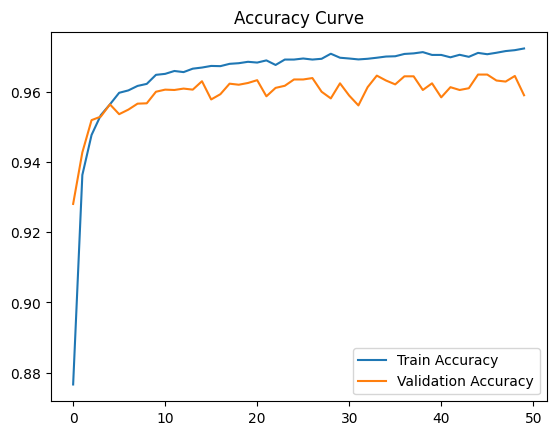

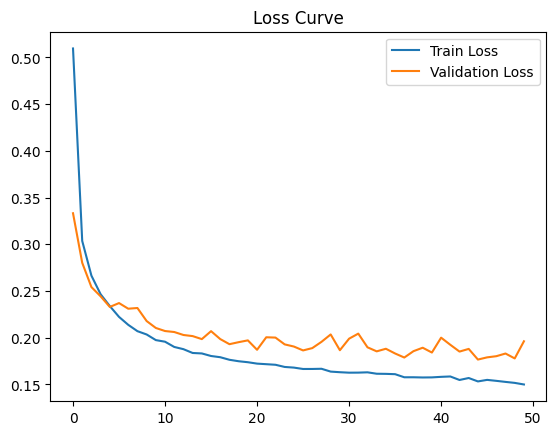

In [ ]:
#Learning Curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


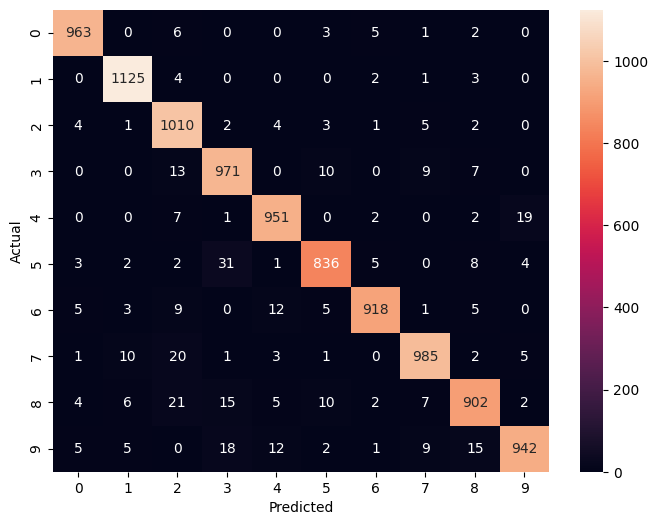

In [ ]:
#Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Get Predictions

In [ ]:

import numpy as np

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


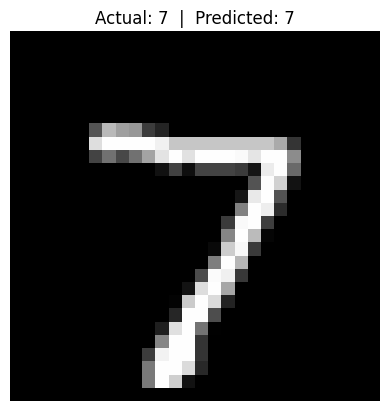

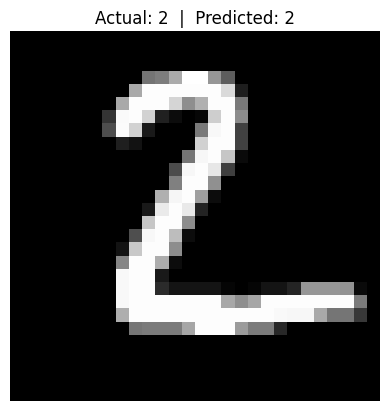

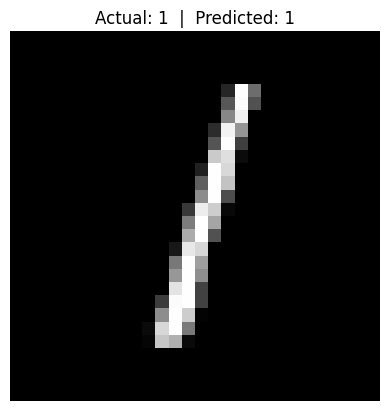

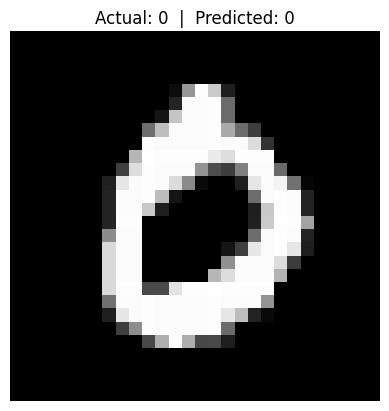

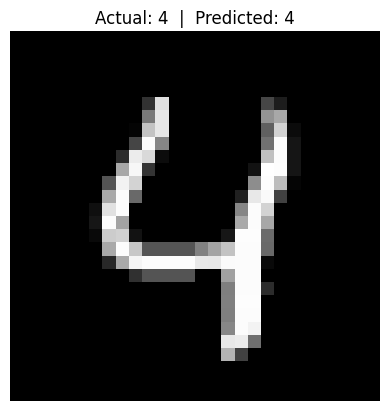

In [ ]:
import matplotlib.pyplot as plt

def show_prediction(index):
    plt.imshow(x_test[index].reshape(28,28), cmap='gray')
    plt.title(f"Actual: {y_test[index]}  |  Predicted: {predicted_labels[index]}")
    plt.axis('off')
    plt.show()

# Try a few examples
for i in range(5):
    show_prediction(i)